In [21]:
using DataFrames
using CSV
using LinearAlgebra
using Plots

In [22]:
#Q1, Minh
function linreg(x, y, lambda)
    m, n = size(x)
    z = x' * x + lambda * Matrix(I, n, n)  # the regularized matrix1
    lin_reg_param = inv(z) * x' * y
    return lin_reg_param
end


linreg (generic function with 1 method)

In [23]:
# Tu Pham
# Questions 2, 3 (linreg)
# Function to calculate predicted responses
function predict(linregparam, x)
    predicted_responses = x * linregparam
    return predicted_responses
end

# Function to calculate R^2
function rsq(predicted_responses, true_responses, mean_prediction)
    predictive_model_error = 0
    for i in eachindex(trueResponses)
        predictive_model_error += ((true_responses[i] - predicted_responses[i]) ^ 2)
    end
    baseline_model_error = 0
    for i in eachindex(trueResponses)
        baseline_model_error += ((true_responses[i] - mean_prediction) ^ 2)
    end
    r_squared = 1 - (predictive_model_error / baseline_model_error)
    return r_squared
end

rsq (generic function with 1 method)

In [24]:
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)

Row,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,String7,Float64,Float64,Float64,Float64,Float64
1,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


In [32]:
# Part 2, q123, Minh

# Q1 
filepath = "./usconsumption.csv"
df = CSV.read(filepath, DataFrame)
df[!, :Intercept] = ones(size(df, 1)) # create an Intercept column and fill it with 1s.

print(df)

227×7 DataFrame
 Row │ Quarter   Percent Change Consumption  Percent Change Income   Percent Change Production   Percent Change Savings   Change Unemployment  Intercept 
     │ String7  Float64                      Float64                Float64                     Float64                  Float64               Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1960Q1                     0.947824               1.1825                      5.85456                  3.18329                     0.1        1.0
   2 │ 1960Q2                     1.26048                0.625615                   -2.19366                 -4.81376                     0.0        1.0
   3 │ 1960Q3                    -0.400781               0.176703                   -1.65811                  5.3346                      0.1        1.0
   4 │ 1960Q4                     0.126736              -0.0418

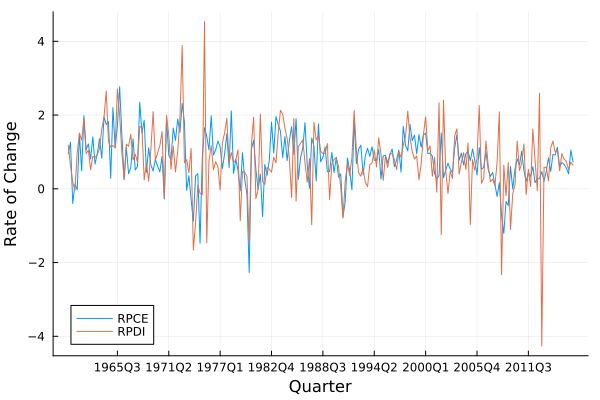

In [26]:
# Q2
x = df[:, "Quarter"]
rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]

plot(x, rpce, xlabel="Quarter", legend=true, label="RPCE")

# Q3
plot!(x, rpdi, xlabel="Quarter", legend=true, label="RPDI")
ylabel!("Rate of Change")

In [27]:
# Tu Pham
# Code to prepare for 4, 5 (timeseries)
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)
time_vector = df[:, "Quarter"]
real_RPCE = df[:, " Percent Change Consumption"]
real_RPDI = df[:, "Percent Change Income"]
RPDI_intercept_features = hcat(real_RPDI, ones(size(df, 1)))
linregparam_with_RPDI_intercept = linreg(RPDI_intercept_features, real_RPCE , 0)
estimated_RPCE = predict(linregparam_with_RPDI_intercept, RPDI_intercept_features)
estimated_RPCE

227-element Vector{Float64}:
 0.9306986574190226
 0.7523070675175525
 0.6085029834006606
 0.538500606991123
 0.8615788550591748
 1.0363053864730771
 0.9746658339008933
 1.1638175598614615
 0.8570120924953345
 0.8872334027592388
 ⋮
 0.8717677533019779
 0.8871068997804434
 0.708994617941334
 0.8578091336904771
 0.8087021280109996
 0.7889691990258717
 0.7181622816358277
 0.7837342716400871
 0.7584210631589459

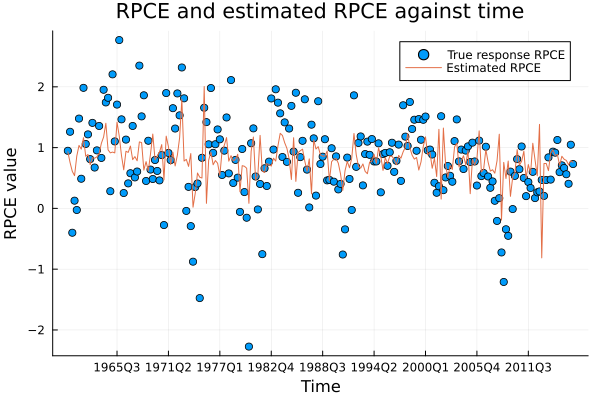

In [28]:
# Tu Pham
# Question 6 (timeseries)
# Plot RPCE and estimated RPCE against time
function plot_RPCE(real_RPCE, estimated_RPCE, time_vector)
    plot(time_vector, real_RPCE, seriestype=:scatter, label="True response RPCE")
    plot!(time_vector, estimated_RPCE, label="Estimated RPCE")
    xlabel!("Time")
    ylabel!("RPCE value")
    title!("RPCE and estimated RPCE against time")
end
plot_RPCE(real_RPCE, estimated_RPCE, time_vector)

In [29]:
# Tu Pham
# Code to prepare for 7, 8 (timeseries)
# Unfinished
time_vector = df[:, "Quarter"]
real_RPCE = df[:, " Percent Change Consumption"]
other_features = df[:, [3, 4, 5, 6]]
other_intercept_features = hcat(other_features, ones(size(df, 1)))
linregparam_with_other_intercept = linreg(other_intercept_features, real_RPCE , 0)
estimated_RPCE = predict(linregparam_with_other_intercept, other_intercept_features)
estimated_RPCE

MethodError: MethodError: no method matching adjoint(::DataFrame)
Closest candidates are:
  adjoint(!Matched::Union{QR, LinearAlgebra.QRCompactWY, QRPivoted}) at C:\Users\12169\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\qr.jl:517
  adjoint(!Matched::Union{Cholesky, CholeskyPivoted}) at C:\Users\12169\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\cholesky.jl:558
  adjoint(!Matched::Hessenberg) at C:\Users\12169\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\hessenberg.jl:424
  ...

In [46]:
#Q7, Minh

# Building a matrix of features from all other features
mat = Matrix(df[:, 3:7])
y = (df[:, 2])
# println(size(mat))

result = linreg(mat, y, 0)

# Printing result
# ? Which one will go first?
println("Weight for RPDI: $(result[1])")
println("Weight for IP: $(result[2])")
println("Weight for PS: $(result[3])")
println("Weight for UR: $(result[4])")
println("Intercept: $(result[5])")


Weight for RPDI: 0.7537050372353764
Weight for IP: 0.03166918728313159
Weight for PS: -0.04897556981461185
Weight for UR: -0.24245971511268483
Intercept: 0.2543022935236794
